**By:** Reynaldo Ace Bonita Jr. 

# Data Exploration using Pyton 2

Environment: Python 2.7.11 and Jupyter notebook

## Tasks:

- Load CSV files as dataframes. 
- Visualize the dataset and explore relationships between attributes
- Perform a simple linear regression and calculate the correlation coefficient

# Data Preprocessing: Melting and Merging

In [482]:
import pandas as pd

In [483]:
# Loading the CSV
df = pd.read_csv('Population.csv')

# Checking loaded contents 
#df.head()
#df.tail()

# Melting the loaded CSV to make the columns as Year and Population with every row as an instance of the data per country
population = pd.melt(df, id_vars=['Year'], var_name='Country')

# Just minor formatting tasks: a) rename the column to 'population' and make the other column names lowercase
population.rename(columns={'value': 'population'}, inplace=True)
population.columns = [x.lower() for x in population.columns]

# Checking if the dataframe was successfully melted
#population.head()
#population.shape

In [484]:
# Doing the same for the Income data
df = pd.read_csv('Income.csv')

# Checking loaded contents 
#df.head()
#df.tail()

income = pd.melt(df, id_vars=['Year'], var_name='Country')
income.rename(columns={'value': 'Income'}, inplace=True)
income.columns = [x.lower() for x in income.columns]

#income.head()
#income.shape

In [485]:
# Merging Population and Income data by matching the Year and Country
merged = pd.merge(left=population,right=income, how='left', left_on=['year','country'], right_on=['year','country'])
merged.head()

# Seems okay because the merged table has 42,705. 
# Population is the longer table with 42,705 rows while Income only has 42,267. 

,year,country,population,income
0,1800,Afghanistan,3280000,603.00
1,1801,Afghanistan,3280000,603.00
2,1802,Afghanistan,3280000,603.00
3,1803,Afghanistan,3280000,603.00
4,1804,Afghanistan,3280000,603.00


In [106]:
# Loading the Gender Ratio CSV
df = pd.read_csv('GenderEquality.csv')
#df.head()
#df.tail()

#Formatting
gender = pd.melt(df, id_vars=['Year'], var_name='Country')
gender.rename(columns={'value': 'Gender_Equality'}, inplace=True)
gender.columns = [x.lower() for x in gender.columns]

#gender.head()
#gender.shape

In [107]:
# Like the previous steps, this merges the Gender Equality data with the Population and Income data by matching the Year and Country

merged = pd.merge(left=merged,right=gender, how='left', left_on=['year','country'], right_on=['year','country'])

# Checking the loaded values
#merged.head()
#merged.tail()

# Upon checking there are 'nan' values in the 'gender_equality' column. 
# These will be filled with 0 values. 
merged.fillna(0, inplace=True)

#merged.tail()

,year,country,population,income,gender_equality
42700,2014,Zimbabwe,15400000,"1,910.00",91.70
42701,2015,Zimbabwe,15800000,"1,890.00",92.10
42702,2016,Zimbabwe,16200000,"1,860.00",0.00
42703,2017,Zimbabwe,16500000,"1,910.00",0.00
42704,2018,Zimbabwe,16900000,"1,950.00",0.00


# Task A: Investigating Population and Gender Equality in Education

## A1. Investigating the Population Data

### A1.1. Population Growth of Australia, China and US over time

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

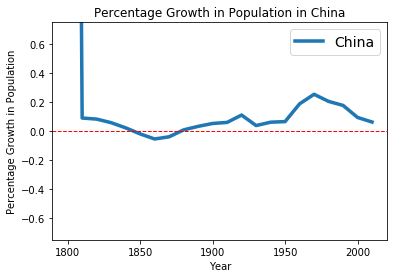

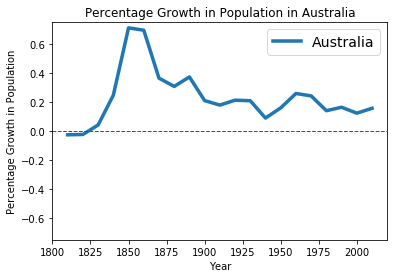

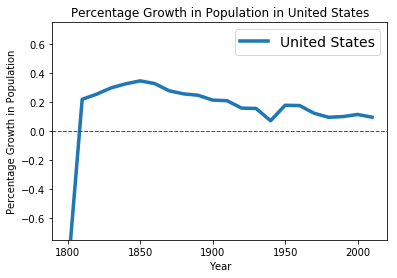

In [258]:
#Create a filter which gets only the population data for Australia, China and the US
filter_aus_ch_us = ((population.country == 'Australia') | (population.country == 'China') | (population.country == 'United States'))

#Create a new dataframe for the 
population_aus_ch_us = population[filter_aus_ch_us]

# Just checking the values of the dataframe using the following methods
#int(population_aus_ch_us.year.min())
#int(population_aus_ch_us.year.max())
#population_aus_ch_us.head()
#population_aus_ch_us.describe()

# The following checks helped verify that data set has population values for all the countries from 1800 to 2018
#population_aus_ch_us.country.unique()
#population_aus_ch_us.country.value_counts()

# Set population column values to be numeric
population_aus_ch_us['population'].apply(pd.to_numeric)

# Keep data points every decade only
population_aus_ch_us = population_aus_ch_us[(population_aus_ch_us.year%10 == 0)]

# Sort the data per country and year ascending and compute the percentage change
population_aus_ch_us['pct']=population_aus_ch_us.sort_values(['country','year']).population.pct_change()
filter_aus_ch_us = ((population_aus_ch_us.country == country))

countries = ["China","Australia","United States"] 

for country in countries:
    # filters the dataframe per country
    filter_aus_ch_us = ((population_aus_ch_us.country == country))
    population_aus_ch_us[filter_aus_ch_us].plot('year','pct',label=country,lw=3.5)
    
    # To better see the movement in the graph, I dediced to limit the range of y values. 
    # Most of the values are within these limits 
    # and there are only a few huge positive values.
    plt.ylim(-.75,.75)
    
    # Labels and legends
    plt.title('Percentage Growth in Population in '+ country)
    plt.xlabel('Year')
    plt.ylabel('Percentage Growth in Population')
    plt.legend(loc='best',fontsize=14)
    
    # Adding a line for y=0 to easily distinguish between positive and negative growth
    plt.axhline(0, xmin=0, xmax=1, color='r', linestyle='--', lw=1)


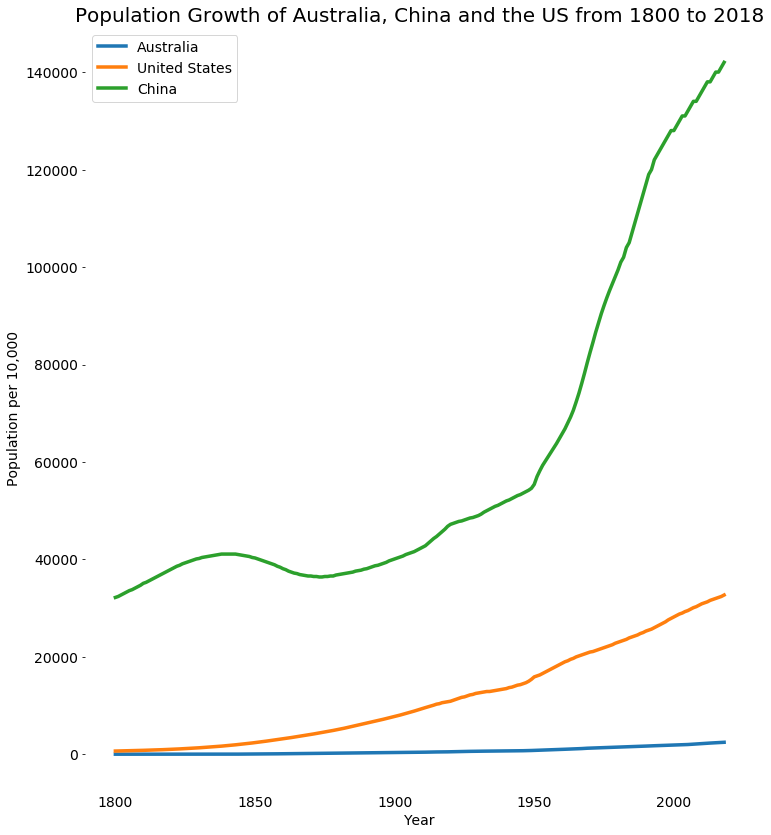

In [144]:
countries = ["Australia","United States","China"] 

#Formatting of the graph area
plt.figure(figsize=(12, 14))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

#Formatting of the title, axis labels and ticks
plt.title('Population Growth of Australia, China and the US from 1800 to 2018',fontsize=20) 
plt.xlabel('Year',fontsize=14)
plt.ylabel('Population per 10,000',fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")  

# Looping through the filtered dataframe
for country in countries:
    # filters the dataframe per country
    filter_aus_ch_us = ((population.country == country))
    population_aus_ch_us = population[filter_aus_ch_us]
    
    # plots the Year in the x-axis and the Population on the y-axis
    # population is divided by 10,000 to make it more readable in the y-axis
    plt.plot(population_aus_ch_us.year,population_aus_ch_us.population/10000,label=country,lw=3.5)
    
    # indicates the location and formatting of the label
    plt.legend(loc='best',fontsize=14)

### A1.2 Linear Regression Fit for Chinese population data

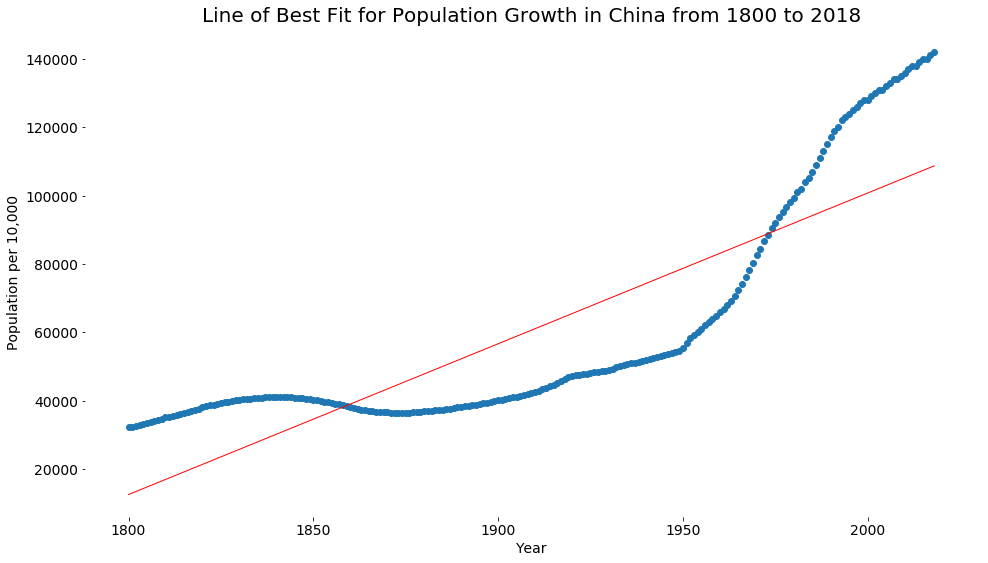

('Intercept is: ', -781493.4677299574)
('Slope is: ', 441.1204542598283)
('R-Value is: ', 0.8446245854164945)
('Std Error is: ', 18.98054842847709)
('p-value is: ', 8.35121783325041e-61)


In [267]:
from scipy.stats import linregress

# Line of Best Fit for Population Growth in China from 1800 to 2018

df = population[(population.country == "China")]

#Formatting of the graph area
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

#Formatting of the title, axis labels and ticks
plt.title('Line of Best Fit for Population Growth in China from 1800 to 2018',fontsize=20) 
plt.xlabel('Year',fontsize=14)
plt.ylabel('Population per 10,000',fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# Using the Linregress package 
slope, intercept, r_value, p_value, std_err = linregress(df['year'],df['population']/10000)

### Here's our function:
line = [slope*xi + intercept for xi in df['year']]

### plot up the line
plt.plot(df['year'],line,'r-', linewidth=1)

##  plot up the data points
plt.scatter(df['year'], df['population']/10000)

plt.show()

print ('Intercept is: ', (intercept))
print ('Slope is: ', (slope))
print ('R-Value is: ', (r_value))
print ('Std Error is: ', (std_err))
print ('p-value is: ', (p_value))

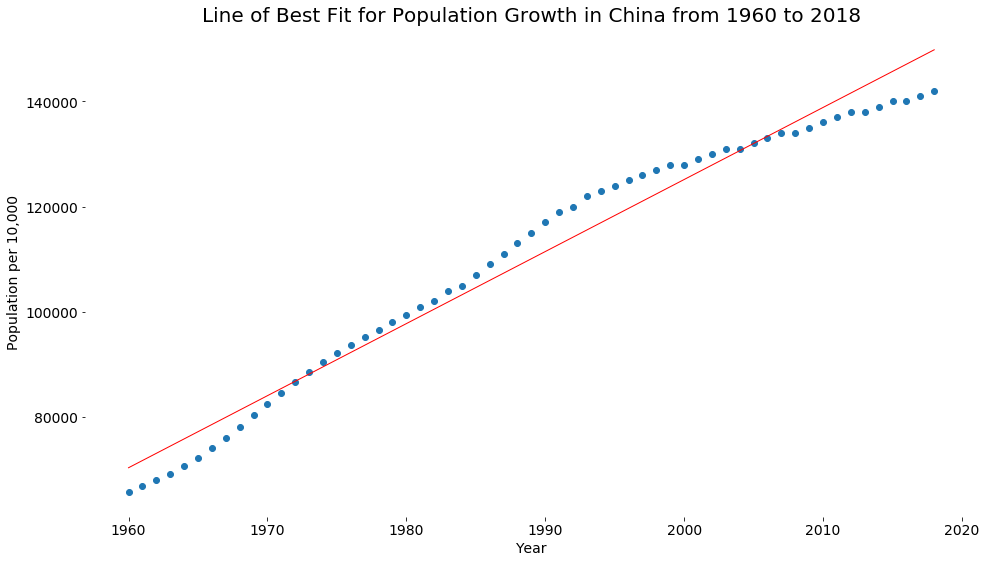

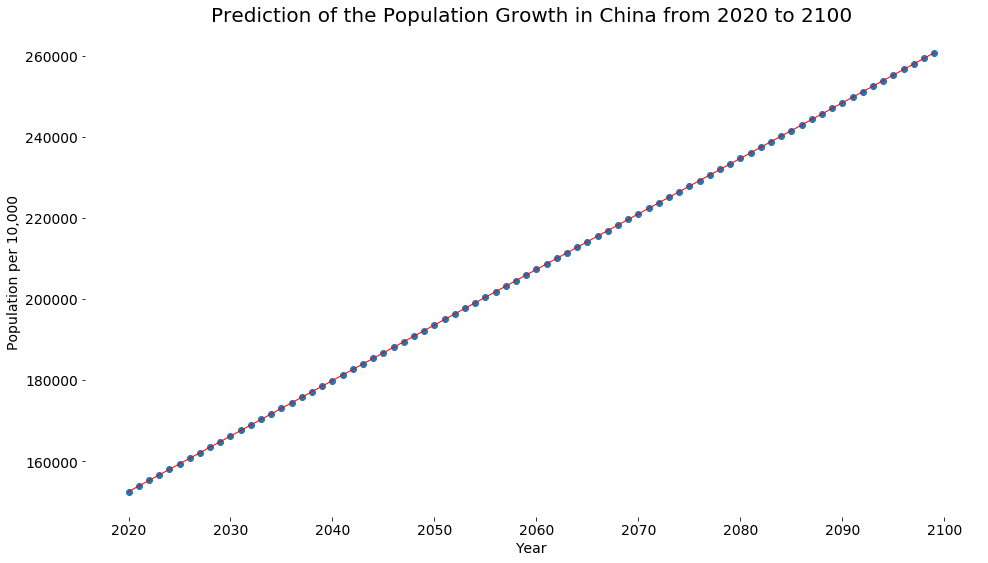

('Intercept is: ', -2614473.2612507306)
('Slope is: ', 1369.812974868498)
('R-Value is: ', 0.9859174756201916)
('Std Error is: ', 30.7754305663705)
('p-value is: ', 5.719190260330088e-46)


,population_prediction,year
0,"152,548.95",2020
5,"159,398.01",2025
10,"166,247.08",2030
15,"173,096.14",2035
20,"179,945.21",2040
25,"186,794.27",2045
30,"193,643.34",2050
35,"200,492.40",2055
40,"207,341.47",2060
45,"214,190.53",2065


In [269]:
from scipy.stats import linregress

## Line of Best Fit for Population Growth in China from 1960 to 2018

df = population[(population.country == "China") & (population.year >= 1960)]

#Formatting of the graph area
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

#Formatting of the title, axis labels and ticks
plt.title('Line of Best Fit for Population Growth in China from 1960 to 2018',fontsize=20) 
plt.xlabel('Year',fontsize=14)
plt.ylabel('Population per 10,000',fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# Using the Linregress package 
slope, intercept, r_value, p_value, std_err = linregress(df['year'],df['population']/10000)

# The simple linear regression function
line = [slope*xi + intercept for xi in df['year']]

# Plotting the line
plt.plot(df['year'],line,'r-', linewidth=1)

# Plotting the actual data points
plt.scatter(df['year'], df['population']/10000)

plt.show()

#############################################
#############################################

## Prediction of the Population Growth in China from 2020 to 2100

#Formatting of the graph area
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

#Formatting of the title, axis labels and ticks
plt.title('Prediction of the Population Growth in China from 2020 to 2100',fontsize=20) 
plt.xlabel('Year',fontsize=14)
plt.ylabel('Population per 10,000',fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# The function
line = [slope*xi + intercept for xi in range(2020,2100,1)]

# Plotting the line
plt.plot(range(2020,2100,1),line,'r-', linewidth=1)

plt.scatter(range(2020,2100,1),line)
plt.show()

# Store predictions in a dataframe
df3 = pd.DataFrame({
    'year': range(2020,2100,1),
    'population_prediction':line
})
#df3.head()

# Show data every 5 years
#df3.iloc[::5, :]

print ('Intercept is: ', (intercept))
print ('Slope is: ', (slope))
print ('R-Value is: ', (r_value))
print ('Std Error is: ', (std_err))
print ('p-value is: ', (p_value))

df3.iloc[::5, :]

## A2. Investigating the Gender Equality Data

### A2.1 Gender Ratio (women % men) in Schools for Australia, China and the US over time.

,year,gender_equality
count,"8,602.00","8,602.00"
mean,"1,992.50",84.01
std,13.28,22.85
min,"1,970.00",11.20
25%,"1,981.00",68.60
50%,"1,992.50",93.60
75%,"2,004.00",101.00
max,"2,015.00",130.00


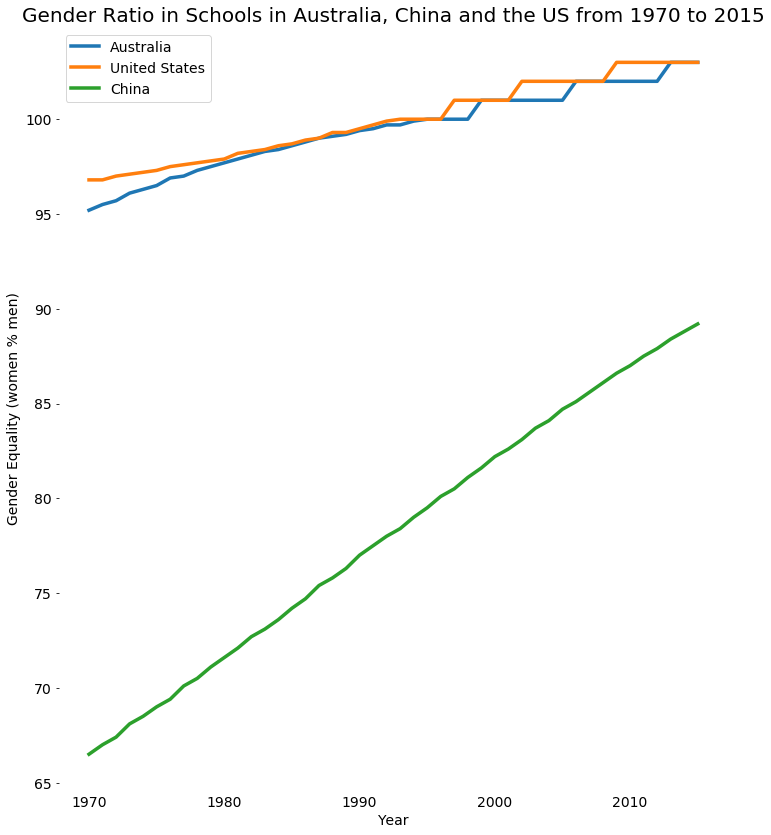

In [275]:
countries = ["Australia","United States","China"] 

plt.figure(figsize=(12, 14))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Gender Ratio in Schools in Australia, China and the US from 1970 to 2015',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Gender Equality (women % men)',fontsize=14)

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")  

for country in countries:
    filter_aus_ch_us = ((gender.country == country))
    subset_for_aus_ch_us = gender[filter_aus_ch_us]
    plt.plot(subset_for_aus_ch_us.year,subset_for_aus_ch_us.gender_equality,label=country,lw=3.5)
    plt.legend(loc='best',fontsize=14)

gender.describe()

In [276]:
df = gender

# Filter by country
filter_aus_ch_us = ((df.country == 'Australia') | (df.country == 'China') | (df.country == 'United States'))

# Apply the filter and group values by country
subset_for_aus_ch_us = df[filter_aus_ch_us]
gender_equality = subset_for_aus_ch_us.groupby('country')['gender_equality']

# Get standard descriptive statistical measures
gender_equality.describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Australia,46.00,99.51,2.17,95.20,97.95,99.70,101.00,103.00
China,46.00,78.10,6.91,66.50,72.25,78.20,84.00,89.20
United States,46.00,99.97,2.06,96.80,98.23,99.95,102.00,103.00


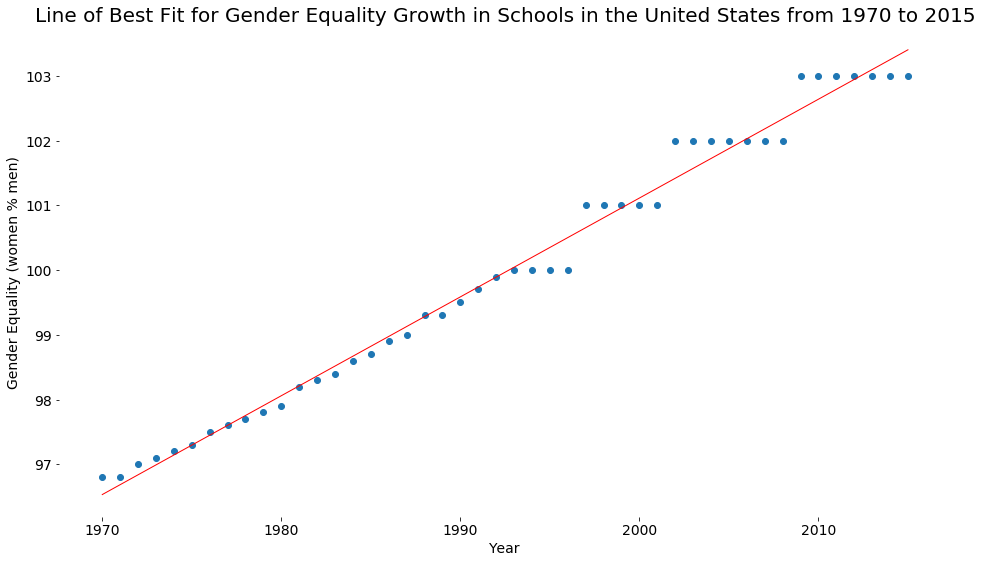

('Intercept is: ', -204.2958988590811)
('Slope is: ', 0.15270428615479492)
('R-Value is: ', 0.9938538076605138)
('Std Error is: ', 0.0025642012790374107)
('p-value is: ', 1.0541317321609284e-43)


In [325]:
from scipy.stats import linregress

# Line of Best Fit for Gender Equality Growth in Schools in the United States from 1800 to 2018

df = gender[(gender.country == "United States")]

#Formatting of the graph area
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

#Formatting of the title, axis labels and ticks
plt.title('Line of Best Fit for Gender Equality Growth in Schools in the United States from 1970 to 2015',fontsize=20) 
plt.xlabel('Year',fontsize=14)
plt.ylabel('Gender Equality (women % men)',fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# Using the Linregress package 
slope, intercept, r_value, p_value, std_err = linregress(df['year'],df['gender_equality'])

### Here's our function:
line = [slope*xi + intercept for xi in df['year']]

### plot up the line
plt.plot(df['year'],line,'r-', linewidth=1)

##  plot up the data points
plt.scatter(df['year'], df['gender_equality'])

plt.show()

print ('Intercept is: ', (intercept))
print ('Slope is: ', (slope))
print ('R-Value is: ', (r_value))
print ('Std Error is: ', (std_err))
print ('p-value is: ', (p_value))

# Checking the values
#df.iloc[::1, :]

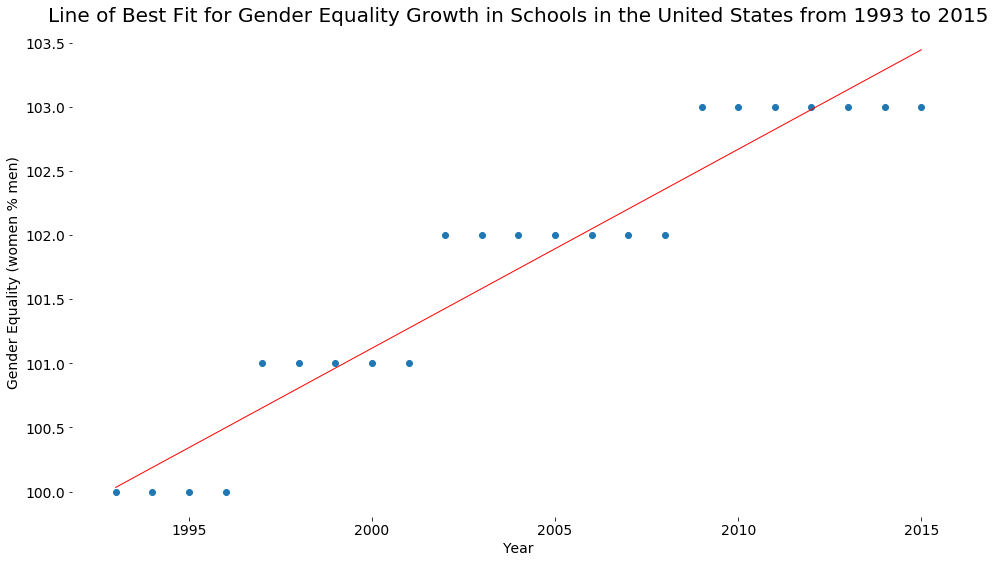

('Intercept is: ', -209.15810276679838)
('Slope is: ', 0.1551383399209486)
('R-Value is: ', 0.9598901265373678)
('Std Error is: ', 0.009888478565161013)
('p-value is: ', 4.5124732803184206e-13)


In [323]:
from scipy.stats import linregress

# Line of Best Fit for Gender Equality Growth in Schools in the United States from 1800 to 2018

df = gender[(gender.country == "United States")&(gender.year >= 1993)]

#Formatting of the graph area
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

#Formatting of the title, axis labels and ticks
plt.title('Line of Best Fit for Gender Equality Growth in Schools in the United States from 1993 to 2015',fontsize=20) 
plt.xlabel('Year',fontsize=14)
plt.ylabel('Gender Equality (women % men)',fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# Using the Linregress package 
slope, intercept, r_value, p_value, std_err = linregress(df['year'],df['gender_equality'])

### Here's our function:
line = [slope*xi + intercept for xi in df['year']]

### plot up the line
plt.plot(df['year'],line,'r-', linewidth=1)

##  plot up the data points
plt.scatter(df['year'], df['gender_equality'])

plt.show()

print ('Intercept is: ', (intercept))
print ('Slope is: ', (slope))
print ('R-Value is: ', (r_value))
print ('Std Error is: ', (std_err))
print ('p-value is: ', (p_value))

## A3. Investigating the Income Data

### A2.2 Income of Australia, China and United States over time. 

In [309]:
# Load the Income data 
df = income

# Filter the set
filter_aus_ch_us = ((df.country == 'China'))
subset_for_aus_ch_us = df[filter_aus_ch_us]

# Group by country
df_grouped = subset_for_aus_ch_us.groupby(['year','country'])['income']

# Look for the minimum value in the income column
min_ch = df['income'] == subset_for_aus_ch_us.income.min()

# Then look for the year of that income value
yr = subset_for_aus_ch_us.loc[min_ch].year
print(yr)

# Just to validate the values. 
# It's just a bit odd that the lowes income value of China is not at the first year in the data set. 
#subset_for_aus_ch_us[(subset_for_aus_ch_us.country == 'China')].sort_values('income').head()
#subset_for_aus_ch_us[(subset_for_aus_ch_us.country == 'China')].sort_values('year').head()

# Filter data set to be limited to Australia, China and the US
filter_aus_ch_us = ((df.country == 'Australia') | (df.country == 'China') | (df.country == 'United States'))
subset_for_aus_ch_us = df[filter_aus_ch_us]

# Look for the values of the other countries in the same year
yr_us = subset_for_aus_ch_us['year'] == int(yr)
subset_for_aus_ch_us.loc[yr_us]

7814    1949
Name: year, dtype: int64


,year,country,income
1901,1949,Australia,11800
7814,1949,China,530
40445,1949,United States,14300


,year,income
count,"42,267.00","42,267.00"
mean,"1,909.00","4,690.94"
std,63.22,"10,261.25"
min,"1,800.00",247.00
25%,"1,854.00",877.00
50%,"1,909.00","1,450.00"
75%,"1,964.00","3,520.00"
max,"2,018.00","178,000.00"


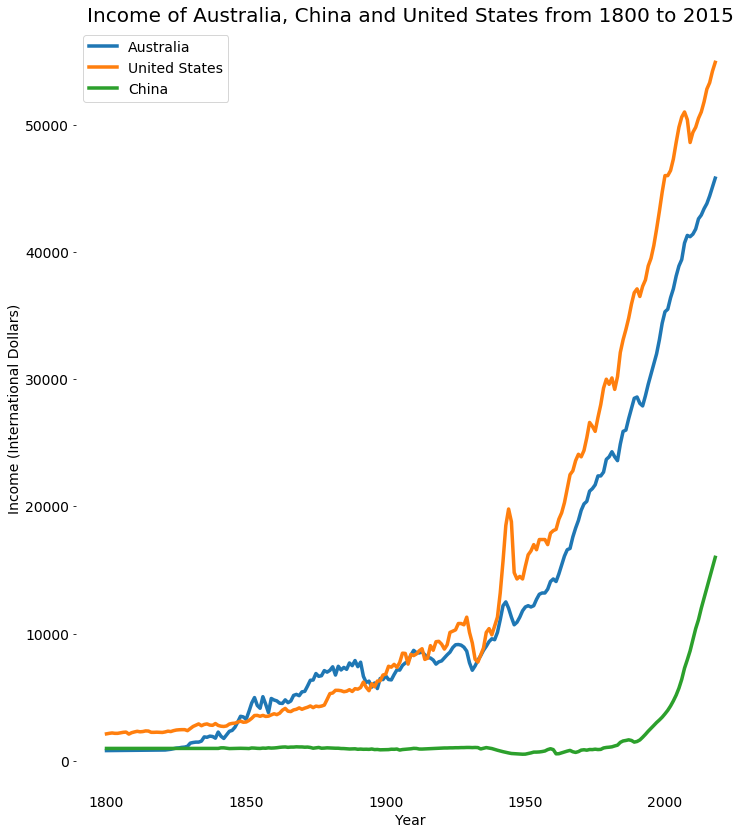

In [281]:
countries = ["Australia","United States","China"] 
df = income

plt.figure(figsize=(12, 14))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Income of Australia, China and United States from 1800 to 2018',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Income (International Dollars)',fontsize=14)

plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")  

for country in countries:
    filter_aus_ch_us = ((df.country == country))
    subset_for_aus_ch_us = df[filter_aus_ch_us]
    plt.plot(subset_for_aus_ch_us.year,subset_for_aus_ch_us.income,label=country,lw=3.5)
    plt.legend(loc='best',fontsize=14)

## A4. Visualising the Relationship between Gender Equality and Population

 A4.1. What is the first year and last year for the combined data? First year is 1970 and last year is 2015.

In [327]:
filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0)
merged[filt].describe()

,year,population,income,gender_equality
count,"8,602.00","8,602.00","8,602.00","8,602.00"
mean,"1,992.50","29,340,469.80","12,920.91",84.01
std,13.28,"113,674,174.42","17,944.33",22.85
min,"1,970.00","20,400.00",247.00,11.20
25%,"1,981.00","1,682,500.00","2,292.50",68.60
50%,"1,992.50","5,780,000.00","6,370.00",93.60
75%,"2,004.00","17,500,000.00","16,000.00",101.00
max,"2,015.00","1,400,000,000.00","178,000.00",130.00


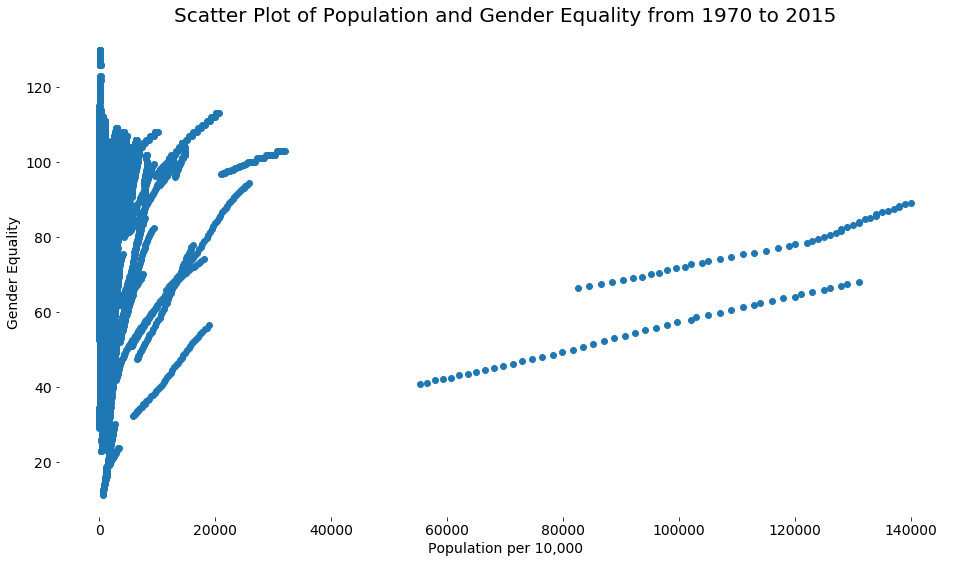

In [343]:
df = merged[filt]

# Formatting settings
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Scatter Plot of Population and Gender Equality from 1970 to 2015', fontsize=20)
plt.xlabel('Population per 10,000',fontsize=14)
plt.ylabel('Gender Equality',fontsize=14)


plt.scatter(df['population']/10000,df['gender_equality'])
plt.show()

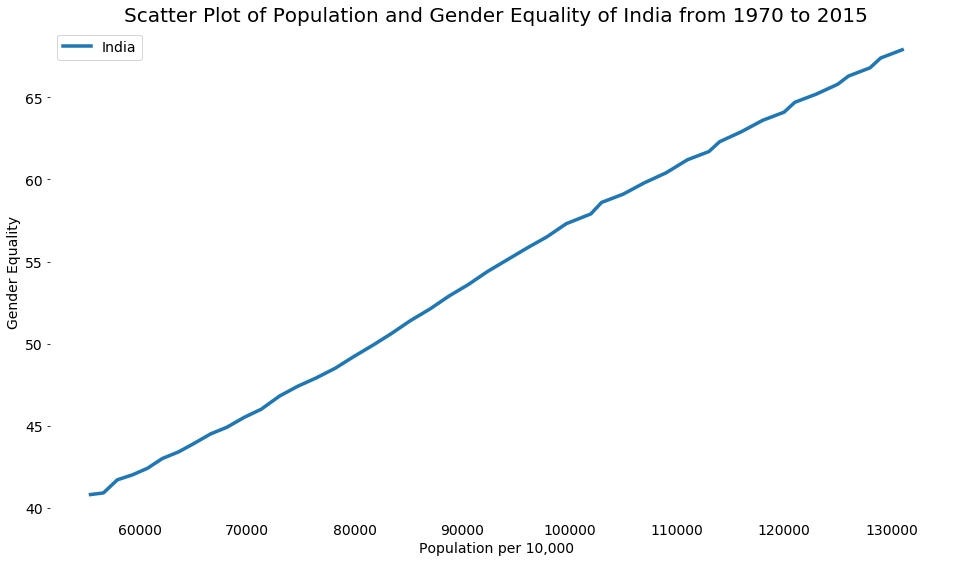

In [353]:
countries = ["India"] 

# Tried checking values for other countries too
#countries = ["Australia","United States","China", "India"] 
df =merged[filt]

# Formatting settings
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
#plt.title('Scatter Plot of Population and Gender Equality of Australia, China, India and the US from 1970 to 2015', fontsize=20)
plt.title('Scatter Plot of Population and Gender Equality of India from 1970 to 2015', fontsize=20)
plt.xlabel('Population per 10,000',fontsize=14)
plt.ylabel('Gender Equality',fontsize=14)

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")  

for country in countries:
    filter_aus_ch_us = ((df.country == country))
    subset_for_aus_ch_us = df[filter_aus_ch_us]
    plt.plot(subset_for_aus_ch_us.population/10000,subset_for_aus_ch_us.gender_equality,label=country,lw=3.5)
    plt.legend(loc='best',fontsize=14)

## A5. Visualising the Relationship over Time

In [354]:
from motionchart.motionchart import MotionChart
import pandas as pd

In [355]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [356]:
# Filters
filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0)
#filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "Cape Verde") | (merged.country == "Bolivia"))

# I tried removing China and India because their population values are much higher than the rest of the countries
#filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & (merged.country != "China")& (merged.country != "India")

merged[filt]
merged_filtered = merged[filt]

mChart = MotionChart(df = merged_filtered)

# The motion chart should show the gender ratio in schools on the x-axis, 
# the income on the y-axis, 
# and the bubble size should depend on the population.
mChart = MotionChart(df = merged_filtered, key='year', 
                     x='gender_equality', 
                     y='income', xscale='linear', yscale='linear',
                     size='population', 
                     color='country', 
                     category='country')

mChart.to_notebook()

- Which two countries generally have the lowest gender ratio (women % men) in schools?
    - Yemen and Afganistan
    
- Which country has the highest gender ratio during the whole period of time?
    - Lesotho and Qatar

- Is the gender ratio generally increasing or decreasing during the whole period of time? How about income? Explain your answer.
    - Gender ratio is generally increasing during the whole period of time. Income is generally increasing for most countries, although not with the same consistency as gender ratio. Countries in the Middle East , like Saudi Arabia, Kuwait, Qatar and the UAE, experienced fluctuations in wealth during the 1970s. Despite this, their gender equality is steadily rising.

    
-  Select Cape Verde and Bolivia for this question: From which year onwards does Cape Verde start to have a higher gender ratio and a higher income from Bolivia. Please support your answer with a relevant python code and motion chart.
    - Cape Verde has never had a higher gender ratio than Bolivia from 1970 to 2015 but Cape Verde's income is higher than Bolivia on 2006-2012. 
    
- Is there generally a relationship between the amount of income and gender ratio (women % men) in schools in all countries during the whole period of time? What kind of relationship? Explain your answer.
    - Need to compute correlation.
    
- Any other interesting things you notice in the data? Please support your answer with relevant python code and/or motion chart
    - removing China and India, fluctuations in country's income in the Middle East in the 1970s is more noticeable. 

In [357]:
# Selecting data from Cape Verde and Bolivia only
filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "Cape Verde") | (merged.country == "Bolivia"))
merged[filt]
merged_filtered = merged[filt]

mChart = MotionChart(df = merged_filtered)

# The motion chart should show the gender ratio in schools on the x-axis, 
# the income on the y-axis, 
# and the bubble size should depend on the population.
mChart = MotionChart(df = merged_filtered, key='year', 
                     x='gender_equality', 
                     y='income', xscale='linear', yscale='linear',
                     size='population', 
                     color='country', 
                     category='country')

mChart.to_notebook()

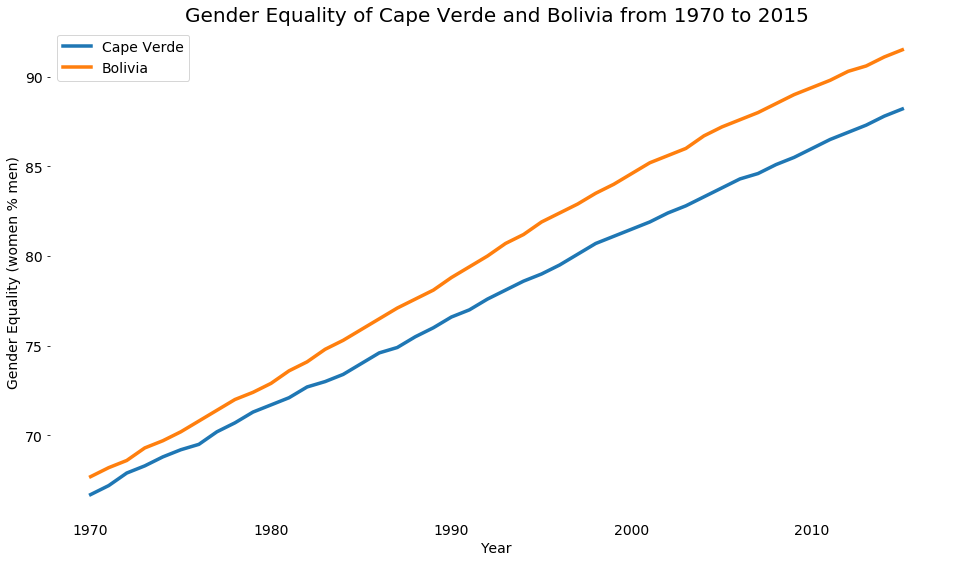

In [366]:
countries = ["Cape Verde","Bolivia"] 

filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "Cape Verde") | (merged.country == "Bolivia"))
merged[filt]
merged_filtered = merged[filt]


plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Gender Equality of Cape Verde and Bolivia from 1970 to 2015', fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Gender Equality (women % men)',fontsize=14)
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")  

df = merged_filtered
for country in countries:
    filter_aus_ch_us = ((df.country == country))
    subset_for_aus_ch_us = df[filter_aus_ch_us]
    plt.plot(subset_for_aus_ch_us.year,subset_for_aus_ch_us.gender_equality,label=country,lw=3.5)
    plt.legend(loc='best',fontsize=14)

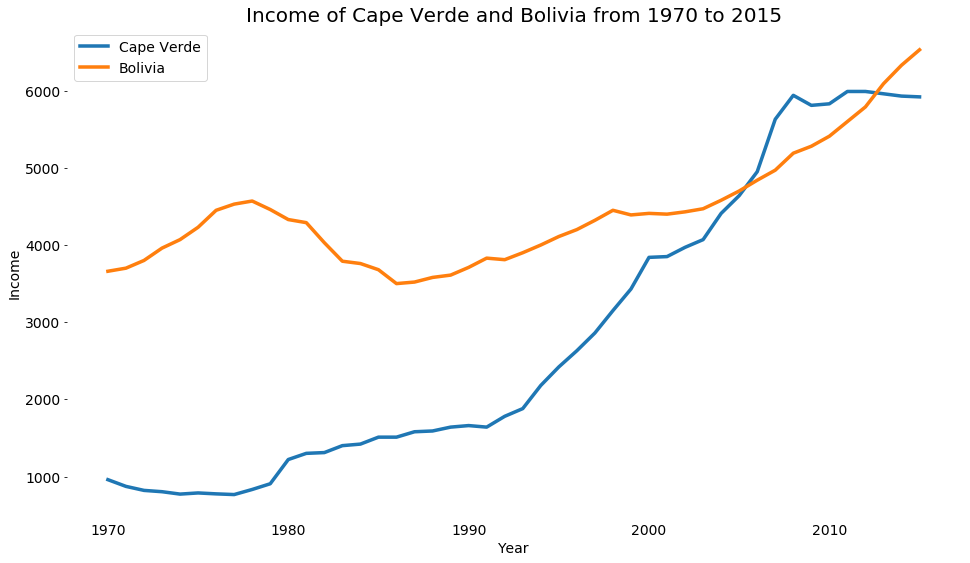

In [361]:
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.title('Income of Cape Verde and Bolivia from 1970 to 2015', fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")  

for country in countries:
    filter_aus_ch_us = ((df.country == country))
    subset_for_aus_ch_us = df[filter_aus_ch_us]
    plt.plot(subset_for_aus_ch_us.year,subset_for_aus_ch_us.income,label=country,lw=3.5)
    plt.legend(loc='best',fontsize=14)

In [364]:
df = pd.read_csv('Income.csv')

# Filter entries where Cape Verde's income is greater than Bolivia
filt = (df["Cape Verde"] > df["Bolivia"])
df_filtered = df[filt]

# Display filtered dataframe
df_filtered[["Year","Cape Verde","Bolivia"]]

,Year,Cape Verde,Bolivia
206,2006,4950,4840
207,2007,5630,4970
208,2008,5940,5190
209,2009,5810,5280
210,2010,5830,5410
211,2011,5990,5600
212,2012,5990,5790


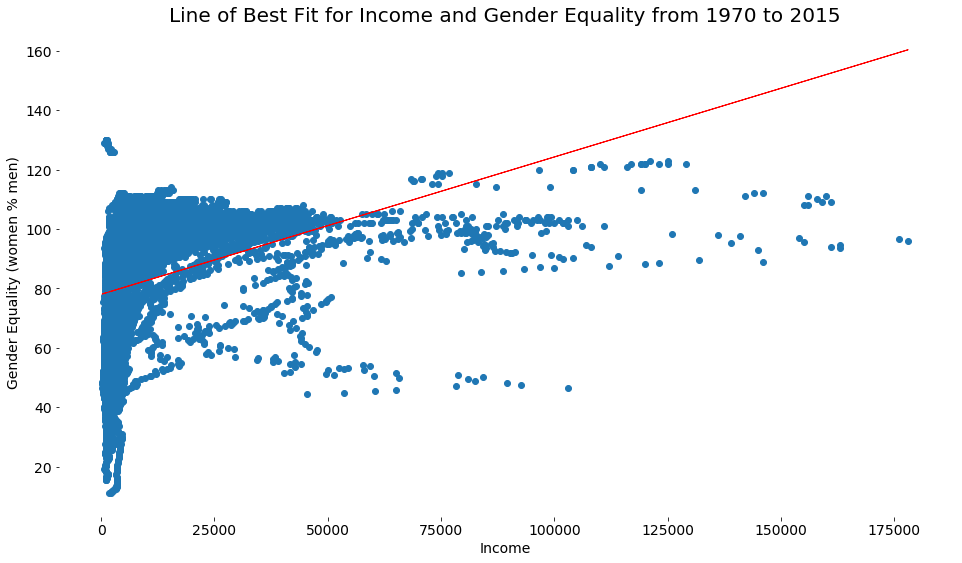

('Intercept is: ', 78.03314202931053)
('Slope is: ', 0.00046222593176318194)
('R-Value is: ', 0.3629799488104919)
('Std Error is: ', 1.279510136066917e-05)
('p-value is: ', 3.447563807442793e-266)


In [379]:
from scipy.stats import linregress

# Line of Best Fit for Gender Equality Growth in Schools in the United States from 1800 to 2018
filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0)

# Isolated some countries
#filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "China"))
#filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "United States"))
#filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "Australia"))
df = merged[filt]

#Formatting of the graph area
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

#Formatting of the title, axis labels and ticks
plt.title('Line of Best Fit for Income and Gender Equality from 1970 to 2015',fontsize=20) 
plt.xlabel('Income',fontsize=14)
plt.ylabel('Gender Equality (women % men)',fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# Using the Linregress package 
slope, intercept, r_value, p_value, std_err = linregress(df['income'],df['gender_equality'])

### Here's our function:
line = [slope*xi + intercept for xi in df['income']]

### plot up the line
plt.plot(df['income'],line,'r-', linewidth=1)

##  plot up the data points
plt.scatter(df['income'], df['gender_equality'])

plt.show()

print ('Intercept is: ', (intercept))
print ('Slope is: ', (slope))
print ('R-Value is: ', (r_value))
print ('Std Error is: ', (std_err))
print ('p-value is: ', (p_value))

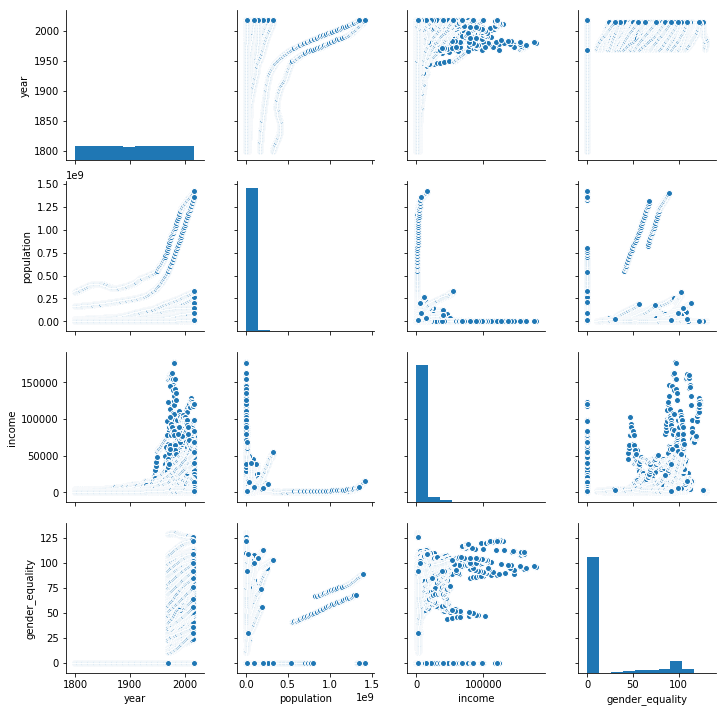

In [380]:
import seaborn as sb

sb.pairplot(merged)

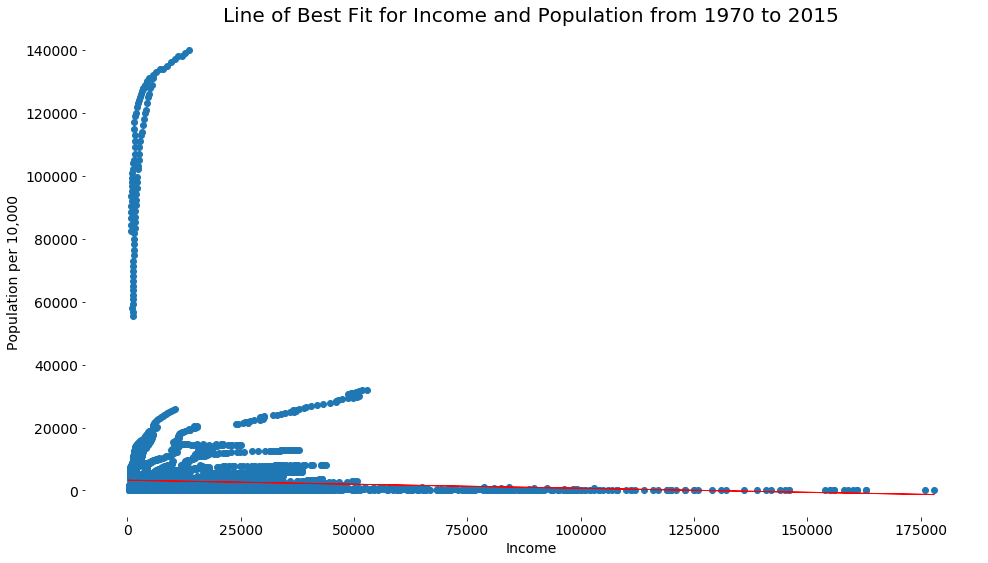

('Intercept is: ', 3265.0295312162943)
('Slope is: ', -0.025616039119422694)
('R-Value is: ', -0.04043685120725995)
('Std Error is: ', 0.006825430765111492)
('p-value is: ', 0.00017586072180197956)


count          42,705.00
mean       12,984,321.06
std        64,351,557.87
min               642.00
25%           283,000.00
50%         1,710,000.00
75%         5,940,000.00
max     1,420,000,000.00
Name: population, dtype: float64

In [400]:
from scipy.stats import linregress

# Line of Best Fit for Gender Equality Growth in Schools in the United States from 1800 to 2018
filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0)

filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country != "China") |(merged.country != "India") |(merged.country != "Indonesia") | (merged.country != "United States") |(merged.country != "Brazil"))
# filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & (merged.country != "China")& (merged.country != "India") & (merged.country != "Indonesia") & (merged.country != "United States") &(merged.country != "Brazil")

#filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "India"))#|(merged.country != "India") |(merged.country != "Indonesia") | (merged.country != "United States"))


# Isolated some countries
#filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "China"))
#filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "United States"))
#filt = (merged.gender_equality > 0) & (merged.population > 0) & (merged.income > 0) & ((merged.country == "Australia"))
df = merged[filt]

#Formatting of the graph area
plt.figure(figsize=(16, 9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

#Formatting of the title, axis labels and ticks
plt.title('Line of Best Fit for Income and Population from 1970 to 2015',fontsize=20) 
plt.xlabel('Income',fontsize=14)
plt.ylabel('Population per 10,000',fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# Using the Linregress package 
slope, intercept, r_value, p_value, std_err = linregress(df['income'],df['population']/10000)

### Here's our function:
line = [slope*xi + intercept for xi in df['income']]

### plot up the line
plt.plot(df['income'],line,'r-', linewidth=1)

##  plot up the data points
plt.scatter(df['income'], df['population']/10000)

plt.show()

print ('Intercept is: ', (intercept))
print ('Slope is: ', (slope))
print ('R-Value is: ', (r_value))
print ('Std Error is: ', (std_err))
print ('p-value is: ', (p_value))

merged['population'].describe()

# Task B: Exploratory Analysis on Big Data

In [529]:
import pandas as pd
df = pd.read_csv('InsuranceRates.csv.zip',compression='zip', sep=',', quotechar='"')

1. How many rows and columns are there? 
    - 7 columns: BusinessYear, StateCode, IssuerId, PlanId, Age, IndividualRate, IndividualTobaccoRate

In [501]:
df.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,nan
1,2014,AK,21989,21989AK0020001,Family Option,36.95,nan
2,2014,AK,21989,21989AK0020001,Family Option,36.95,nan
3,2014,AK,21989,21989AK0010001,21,32.00,nan
4,2014,AK,21989,21989AK0010001,22,32.00,nan


2. How many years does the data cover?
    - 3 years, namely 2014, 2015, 2016

In [502]:
df.BusinessYear.unique()

array([2014, 2015, 2016])

3. What are the possible values for 'Age'?
    - '0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'

In [503]:
df.Age.unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

4. How many states are there?
    - 39, namely 'AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'

In [504]:
len(df.StateCode.unique())
df.StateCode.unique()

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

5. How many insurance providers are there?
    - There are 910 providers.

In [505]:
len(df.IssuerId.unique())

910

6. What are the average, maximum and minimum values for the monthly insurance premium cost for an individual? Do those values seem reasonable to you?
    - The insurance premium cost for an individual ranges from  USD 0.00, the minimum, to  USD 999,999.00. Even if 24% of the data only pays about 29.33, and 50th percentile is 291.60 and the 75th percentile is 478.98, the maximum value of 999,999 is unreasonable. 

In [506]:
pd.options.display.float_format = '{:,.2f}'.format
df['IndividualRate'].describe()

count   12,694,445.00
mean         4,098.03
std         61,222.71
min              0.00
25%             29.33
50%            291.60
75%            478.98
max        999,999.00
Name: IndividualRate, dtype: float64

## B2. Investigating Individual Insurance Costs

1. Show the distribution of ‘IndividualRate’ values using a histogram. Does the distribution make sense? What might be going on?
    - The distribution does not make sense. There are too many outliers on the left and right extreme values of the x axis.

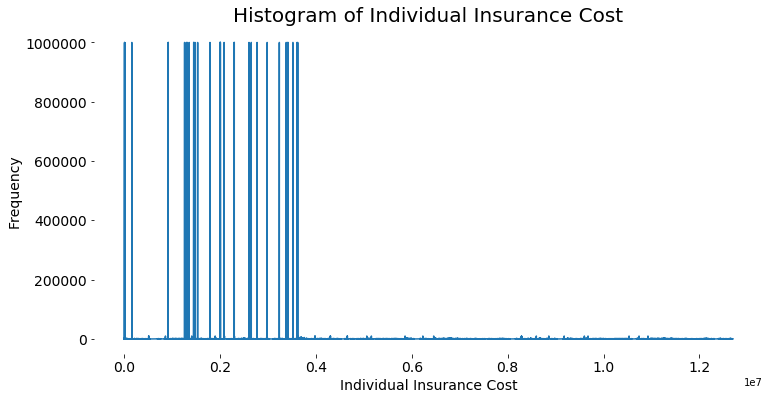

In [507]:
import matplotlib.pyplot as plt #import library for plotting
%matplotlib inline

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Histogram of Individual Insurance Cost',fontsize=20)
plt.xlabel('Individual Insurance Cost',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

#df.IndividualRate.hist(bins = 200)
plt.plot(df.IndividualRate)
plt.show()


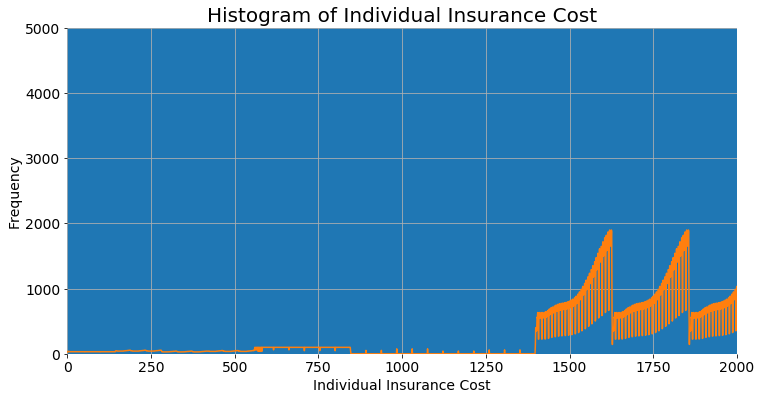

In [508]:
import matplotlib.pyplot as plt #import library for plotting
%matplotlib inline

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Histogram of Individual Insurance Cost',fontsize=20)
plt.xlabel('Individual Insurance Cost',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

plt.xlim(0,2000) # setting limit on x-axis
plt.ylim(0,5000)
df.IndividualRate.hist(bins = 200)
plt.plot(df.IndividualRate)
plt.show()


2. Remove rows with insurance premiums of 0 (or less) and over 2000. (Use this data from now on.) Generate a new histogram with a larger number of bins (say 200). Does this data look more sensible? Describe the data. How many groups can you see?
    - The data looks more sensible. I can see 3 groups, namely: around 1,375 to 1,625; 1,626 to 1,875; 1,876 to 2000.


In [530]:
filt = (df.IndividualRate > 0) & (df.IndividualRate <= 2000)
df = df[filt]
df.describe()

,BusinessYear,IssuerId,IndividualRate,IndividualTobaccoRate
count,"11,935,878.00","11,935,878.00","11,935,878.00","4,928,732.00"
mean,"2,015.03","52,135.53",332.98,541.40
std,0.80,"26,574.86",294.17,280.93
min,"2,014.00","10,046.00",0.01,41.73
25%,"2,014.00","29,698.00",32.92,339.03
50%,"2,015.00","49,532.00",306.97,463.09
75%,"2,016.00","76,179.00",489.78,683.68
max,"2,016.00","99,969.00","2,000.00","2,677.79"


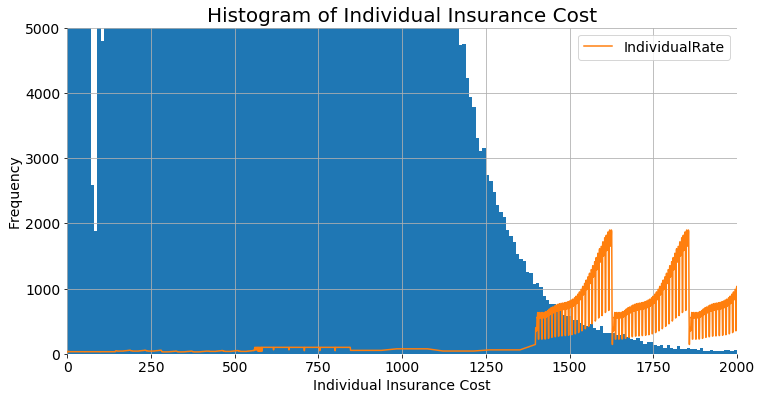

In [510]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Histogram of Individual Insurance Cost',fontsize=20)
plt.xlabel('Individual Insurance Cost',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

df.IndividualRate.hist(bins = 200)
plt.xlim(0,2000) # setting limit on x-axis
plt.ylim(0,5000)
plt.plot(df.IndividualRate)
plt.legend(loc='best',fontsize=14)
plt.show()

## B3. Variation in Costs across States

1. Generate a graph containing boxplots summarising the distribution of values for each state. Which state has the lowest median insurance rates and which one has the highest? (Hint: you may need to rotate the state labels to be able to read the plot.)
    - The state with the lowest median insurance rate is Missouri (MO) and the one with the highest is Alaska (AK).

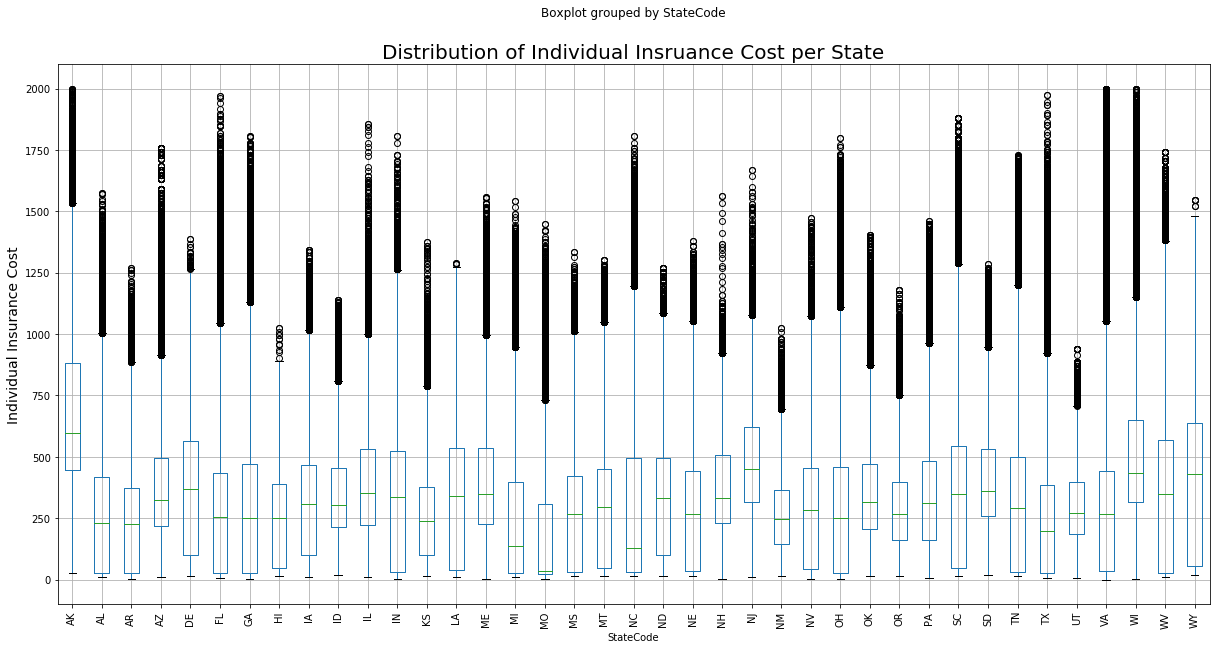

In [511]:
state = df.groupby(['StateCode'])
df.boxplot(column = 'IndividualRate', by = 'StateCode',figsize=(20,10))
plt.title('Distribution of Individual Insruance Cost per State', fontsize=20)
plt.ylabel('Individual Insurance Cost',fontsize=14)

plt.xticks(rotation=90)
plt.show()

2. Does the number of insurance issuers vary greatly across states? Create a bar chart of the number of insurance companies in each state to see. (Hint: you will need to aggregate the data by state to do this.)
    - The number of issuers vary greatly across states with Hawaii (HI) as the lowest with 1,473 providers and Florida (FL) as the highest with 1,586,693 issuers.

,count,mean,std,min,25%,50%,75%,max
StateCode,,,,,,,,
AK,"78,686.00","62,165.97","17,156.93","21,989.00","38,344.00","73,836.00","73,836.00","96,211.00"
AL,"178,020.00","51,114.63","19,614.97","12,538.00","46,211.00","46,944.00","59,809.00","82,285.00"
AR,"73,436.00","58,517.93","19,618.19","13,285.00","31,227.00","65,817.00","75,293.00","75,293.00"
AZ,"332,896.00","66,373.32","23,836.26","12,303.00","51,485.00","53,901.00","91,450.00","99,180.00"
DE,"14,308.00","66,795.46","17,054.26","13,537.00","67,190.00","76,168.00","76,168.00","96,320.00"
FL,"1,586,693.00","47,467.07","27,513.50","12,438.00","27,357.00","48,121.00","59,667.00","99,787.00"
GA,"446,794.00","67,846.81","20,334.20","17,382.00","49,046.00","73,231.00","86,637.00","98,239.00"
HI,"1,473.00","34,109.51","20,553.13","10,046.00","18,350.00","18,350.00","60,612.00","60,612.00"
IA,"163,365.00","58,553.00","22,778.36","11,474.00","27,651.00","71,051.00","74,980.00","93,078.00"


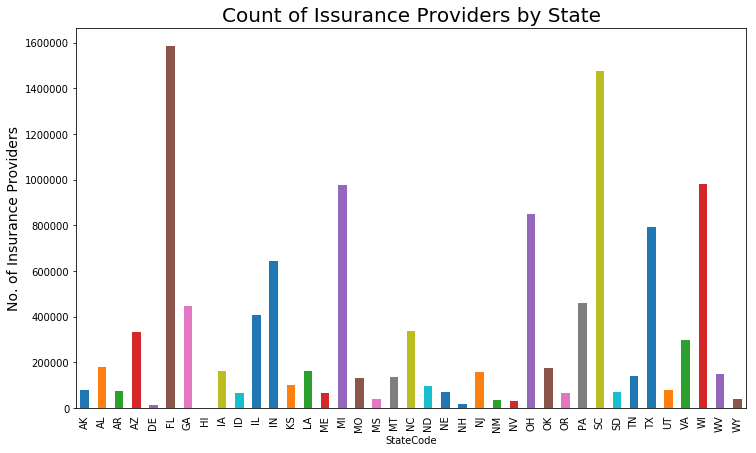

In [526]:
issuer_by_state = df.groupby(['StateCode'])['IssuerId']
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")  
plt.title('Count of Issurance Providers by State',fontsize=20)
plt.ylabel('No. of Insurance Providers',fontsize=14)
issuer_by_state.size().plot.bar(figsize=(12, 7))
issuer_by_state.describe()
#issuer_by_state.head()
#issuer_by_state.count()

,count,mean,std,min,25%,50%,75%,max
StateCode,,,,,,,,
AK,"78,686.00",672.44,370.75,25.84,448.00,597.93,883.00,"1,998.00"
AL,"178,020.00",273.53,282.63,8.34,24.57,229.05,416.76,"1,574.19"
AR,"73,436.00",241.28,233.64,3.93,28.32,225.59,371.94,"1,268.28"
AZ,"332,896.00",367.85,251.62,9.23,217.22,325.25,495.47,"1,758.61"
DE,"14,308.00",399.78,300.16,13.95,99.99,366.86,565.93,"1,387.23"
FL,"1,586,693.00",276.91,276.51,6.60,25.35,253.87,433.97,"1,971.69"
GA,"446,794.00",302.00,315.00,1.50,27.23,250.89,468.56,"1,806.58"
HI,"1,473.00",264.17,219.27,15.89,46.59,250.93,387.52,"1,024.29"
IA,"163,365.00",333.82,259.57,10.50,99.00,307.46,466.49,"1,340.43"


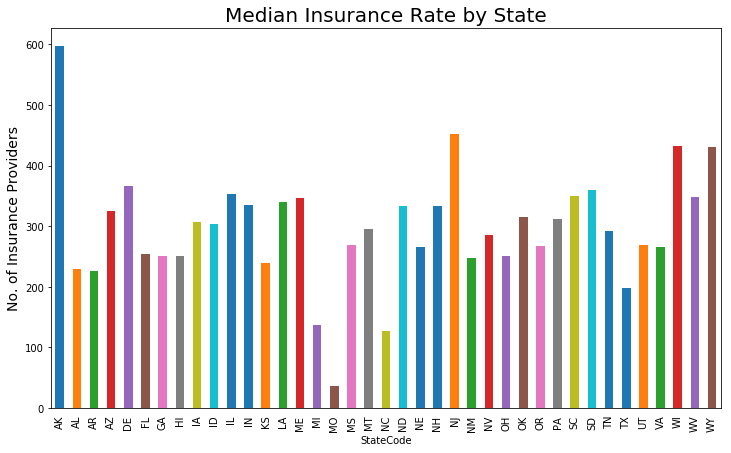

In [519]:
issuranceRate_by_state = df.groupby(['StateCode'])['IndividualRate']
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")  
plt.title('Median Insurance Rate by State',fontsize=20)
plt.ylabel('No. of Insurance Providers',fontsize=14)
issuranceRate_by_state.median().plot.bar(figsize=(12, 7))
issuranceRate_by_state.describe()
# issuranceRate_by_state.head()

3. Could competition explain the difference in insurance premiums across states? Use a scatterplot to plot the number of insurance issuers against the median insurance cost for each state. Do you observe a relationship?

In [455]:
#issuer_by_state.size()
df1 = issuer_by_state.size()
df2 = issuranceRate_by_state.median()

#df1.index.values
#df2.index.values

In [464]:
#df1 = pd.DataFrame([issuer_by_state.median()],["IssuerId"])
#df2 = pd.DataFrame([issuer_by_state.size()],["IssuerId"])

df1 = pd.DataFrame([issuer_by_state.count()],['IssuerId'])
df2 = pd.DataFrame([issuranceRate_by_state.median()],['IndividualRate'])

df1 = df1.transpose()
df2 = df2.transpose()
#df1.head()
#df2.head()

In [467]:
merged_df = pd.merge(left=df1, right=df2,how='left',left_index=True, right_index=True)
#merged_df.head()
#merged_df.tail()

# merged_df.rename(columns={'IssuerId_y': 'insurance_provider_count'}, inplace=True)
# merged_df.rename(columns={'IssuerId_x': 'median_insurance_premium_cost'}, inplace=True)
merged_df.rename(columns={'IssuerId': 'insurance_provider_count'}, inplace=True)
merged_df.rename(columns={'IndividualRate': 'median_insurance_premium_cost'}, inplace=True)
merged_df.describe()

,insurance_provider_count,median_insurance_premium_cost
count,39.00,39.00
mean,"306,048.15",297.30
std,"394,213.23",94.39
min,"1,473.00",35.94
25%,"67,962.00",250.94
50%,"142,218.00",294.80
75%,"372,407.00",343.04
max,"1,586,693.00",597.93


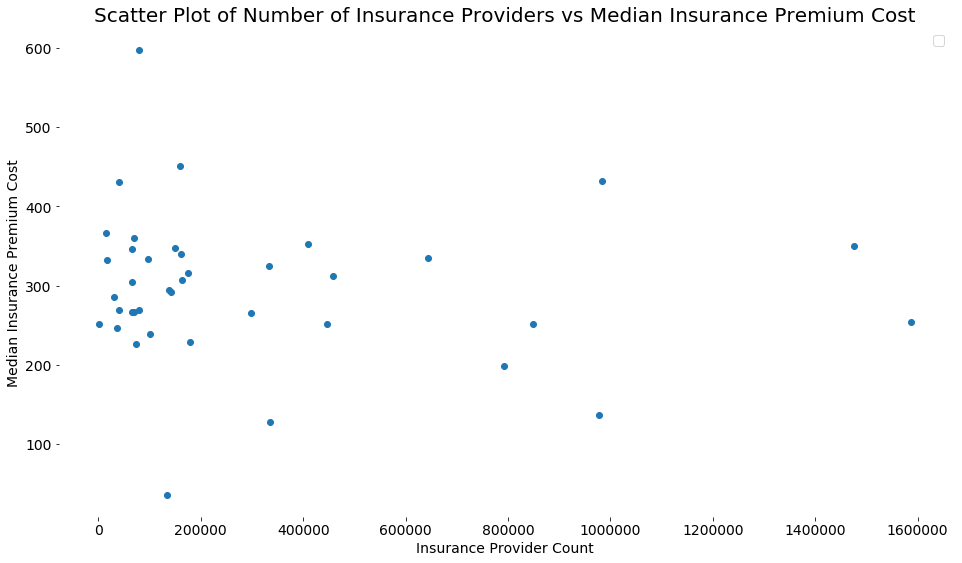

In [518]:
plt.figure(figsize=(16,9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Scatter Plot of Number of Insurance Providers vs Median Insurance Premium Cost',fontsize=20)
plt.xlabel('Insurance Provider Count',fontsize=14)
plt.ylabel('Median Insurance Premium Cost',fontsize=14)
plt.legend(loc='best',fontsize=14)

plt.scatter(merged_df['insurance_provider_count'], merged_df['median_insurance_premium_cost'])
plt.show()

## B4. Variation in Costs over Time and with Age

Generate boxplots (or other plots) of insurance costs versus year and age to answer the following questions:

1. Are insurance policies becoming cheaper or more expensive over time? Is the median insurance cost increasing or decreasing?


In [ ]:
# line graph x axis is time, and line value is median insurance premium cost, per state ,(possibly superimpose an overall median cost)

BusinessYear
2014   298.62
2015   306.49
2016   316.35
Name: IndividualRate, dtype: float64

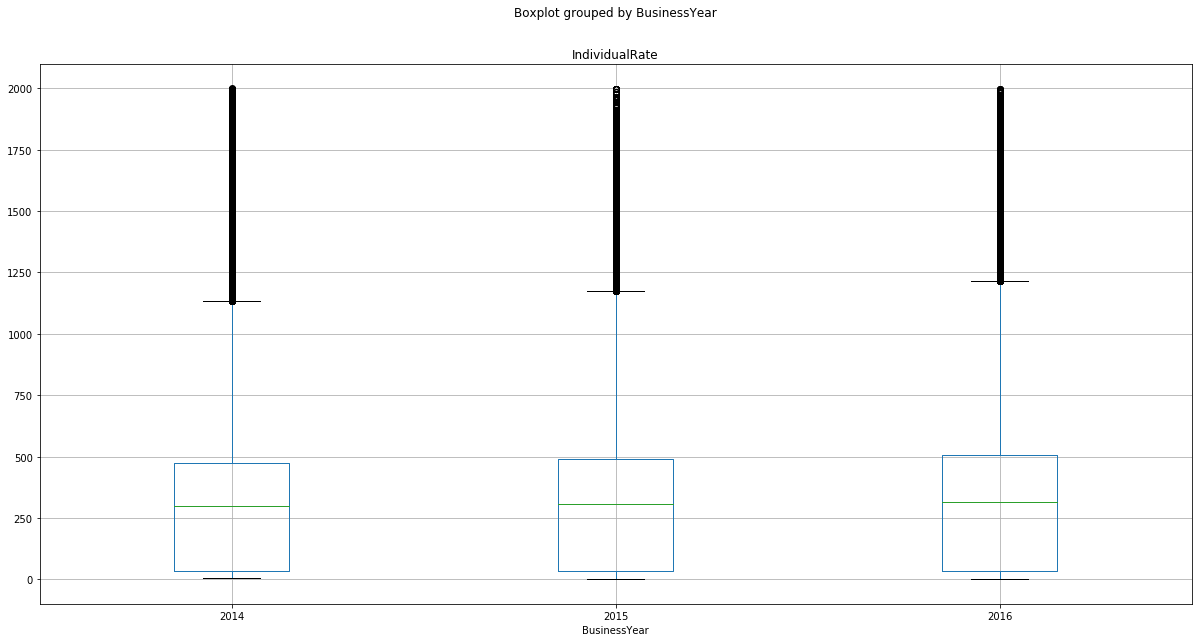

In [539]:
df.head()

#insurance_policy_over_time = df.groupby(['StateCode','BusinessYear'])['IndividualRate']
#insurance_policy_over_time = df.groupby(['BusinessYear'])['IndividualRate']
#insurance_policy_over_time.describe()

insurance_policy_over_time = df.groupby(['BusinessYear'])
df.boxplot(column = 'IndividualRate', by = 'BusinessYear',figsize=(20,10))

In [541]:
insurance_policy_over_time.describe()

IndividualRate                                                  \
                      count   mean    std  min   25%    50%    75%      max   
BusinessYear                                                                  
2014           3,652,476.00 326.35 284.40 6.00 33.47 298.62 473.39 2,000.00   
2015           4,327,323.00 334.06 295.05 0.01 33.11 306.49 489.81 1,997.58   
2016           3,956,079.00 337.91 301.87 1.50 32.33 316.35 505.10 1,998.00   

             IndividualTobaccoRate           ...                     \
                             count   mean    ...       75%      max   
BusinessYear                                 ...                      
2014                  1,630,848.00 552.78    ...    692.91 2,399.20   
2015                  1,765,295.00 525.57    ...    665.35 2,379.86   
2016                  1,532,589.00 547.54    ...    693.96 2,677.79   

                 IssuerId                                                    \
                    count      mean       std       min       25%       50%   
BusinessYear                                                                  
2014         3,652,476.00 50,926.21 26,046.14 10,191.00 29,698.00 49,193.00   
2015         4,327,323.00 52,380.20 26,616.35 10,064.00 29,698.00 49,532.00   
2016         3,956,079.00 52,984.41 26,969.60 10,046.00 30,219.00 49,532.00   

                                  
                   75%       max  
BusinessYear                      
2014         71,268.00 99,969.00  
2015         77,305.00 99,969.00  
2016         79,597.00 99,969.00  

[3 rows x 24 columns]

In [544]:
# Removing the Family Option before graphing
filt = (df.Age != 'Family Option')
df = df[filt]

premium_per_age= df.groupby(['Age'])['IndividualRate']

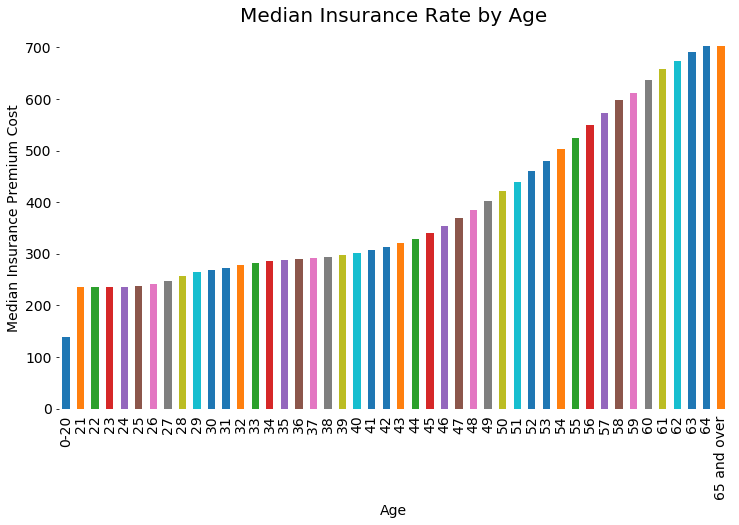

In [549]:
plt.figure(figsize=(16,9))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")  
plt.title('Median Insurance Rate by Age',fontsize=20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Median Insurance Premium Cost',fontsize=14)
premium_per_age.median().plot.bar(figsize=(12, 7))

In [551]:
premium_per_age.median()

Age
0-20          138.59
21            235.51
22            235.57
23            235.68
24            235.83
25            237.07
26            241.91
27            247.54
28            256.59
29            264.00
30            267.73
31            273.30
32            278.90
33            282.38
34            286.10
35            287.99
36            289.86
37            291.74
38            293.65
39            297.41
40            301.20
41            306.90
42            312.32
43            319.92
44            329.36
45            340.41
46            353.56
47            368.33
48            385.24
49            401.90
50            420.66
51            439.15
52            459.53
53            480.18
54            502.34
55            524.55
56            548.55
57            572.84
58            598.65
59            611.83
60            636.88
61            658.57
62            672.94
63            690.71
64            701.57
65 and over   702.22
Name: IndividualRate, dtype: f

In [552]:
premium_per_age.describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-20,"275,315.00",122.33,86.24,3.93,29.34,138.59,189.21,"1,164.98"
21,"258,401.00",215.08,177.04,1.50,32.56,235.51,309.07,"1,834.62"
22,"258,401.00",215.15,177.11,1.50,32.56,235.57,309.08,"1,834.62"
23,"258,401.00",215.23,177.18,1.50,32.56,235.68,309.11,"1,834.62"
24,"258,401.00",215.33,177.25,1.50,32.56,235.83,309.13,"1,834.62"
25,"258,401.00",215.91,178.03,1.50,31.93,237.07,310.42,"1,841.96"
26,"258,401.00",219.66,180.07,1.50,32.10,241.91,316.59,"1,878.65"
27,"258,401.00",224.08,182.55,1.50,32.10,247.54,323.89,"1,922.68"
28,"258,401.00",231.21,186.61,1.50,32.10,256.59,335.69,"1,994.23"


2. How does insurance costs vary with the age of the person being insured? (Hint: filter out the value 'Family Option' before plotting the data.) In terms of median cost, do older people pay more or less for insurance than younger people? How much more/less to they pay?
    - Insurance costs increase as the age of the person being insured increase too. Older persons pay about 66.46% to 80.2% to more than the younger ones . The median insurance cost for persons aged 65 and over is 702.22 while 0-20 and 21 year olds pay only 138.59 and 235.51 respectively. 

# Task C - Exploring Relationship of Weather and Sales

In [75]:
import pandas as pd
# Loading the CSV
sales = pd.read_csv('sales_train.csv.zip',compression='zip', sep=',', quotechar='"')
weather = pd.read_csv('weather.csv.zip',compression='zip', sep=',', quotechar='"')

In [560]:
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617600 entries, 0 to 4617599
Data columns (total 4 columns):
date         object
store_nbr    int64
item_nbr     int64
units        int64
dtypes: int64(3), object(1)
memory usage: 140.9+ MB


,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [76]:
weather.info()
weather.tail()
weather.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 20 columns):
station_nbr    20517 non-null int64
date           20517 non-null object
tmax           20517 non-null object
tmin           20517 non-null object
tavg           20517 non-null object
depart         20517 non-null object
dewpoint       20517 non-null object
wetbulb        20517 non-null object
heat           20517 non-null object
cool           20517 non-null object
sunrise        20517 non-null object
sunset         20517 non-null object
codesum        20517 non-null object
snowfall       20517 non-null object
preciptotal    20517 non-null object
stnpressure    20517 non-null object
sealevel       20517 non-null object
resultspeed    20517 non-null object
resultdir      20517 non-null object
avgspeed       20517 non-null object
dtypes: int64(1), object(19)
memory usage: 3.1+ MB


,station_nbr
count,20517.000000
mean,10.549057
std,5.768533
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,20.000000


In [72]:
sales_per_product = sales.groupby(['item_nbr'])['units']

In [71]:
sales_per_product = sales.groupby(['date'][:4])['units']
sales_per_product.head()


sales['units'].groupby(sales['date'].str[:4]).describe().reset_index()


,date,count,mean,std,min,25%,50%,75%,max
0,2012,1806303.0,1.121874,11.252974,0.0,0.0,0.0,0.0,5568.0
1,2013,1559439.0,0.971435,9.648592,0.0,0.0,0.0,0.0,3369.0
2,2014,1251858.0,0.811322,7.811186,0.0,0.0,0.0,0.0,435.0


In [62]:
sales.groupby(sales['date'].str[:4]).mean().reset_index()

,date,store_nbr,item_nbr,units
0,2012,22.887912,56.0,1.121874
1,2013,23.239305,56.0,0.971435
2,2014,23.199592,56.0,0.811322


In [21]:
sales.groupby(sales['item_nbr']).describe().reset_index()

item_nbr store_nbr                                                     \
                 count       mean        std  min   25%   50%   75%   max   
0          1   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
1          2   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
2          3   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
3          4   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
4          5   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
5          6   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
6          7   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
7          8   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
8          9   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
9         10   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
10        11   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
11        12   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
12        13   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
13        14   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
14        15   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
15        16   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
16        17   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
17        18   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
18        19   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
19        20   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
20        21   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
21        22   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
22        23   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
23        24   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
24        25   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
25        26   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
26        27   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
27        28   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
28        29   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
29        30   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
..       ...       ...        ...        ...  ...   ...   ...   ...   ...   
81        82   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
82        83   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
83        84   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
84        85   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
85        86   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
86        87   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
87        88   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
88        89   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
89        90   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
90        91   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
91        92   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
92        93   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
93        94   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
94        95   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
95        96   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
96        97   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
97        98   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
98        99   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   
99       100   41600.0  23.091082  12.952962  1.0  12.0  23.0  34.0  45.0   


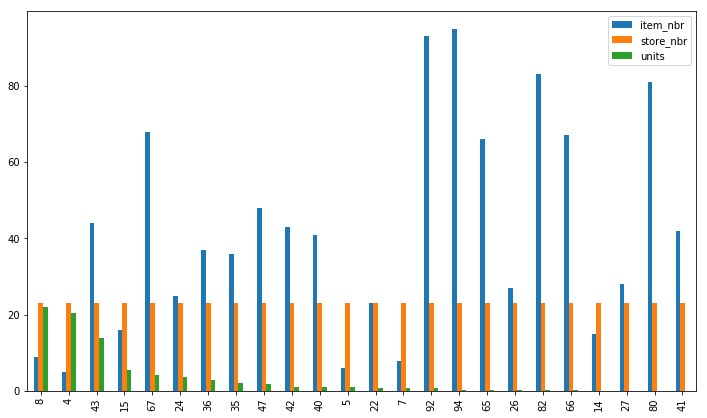

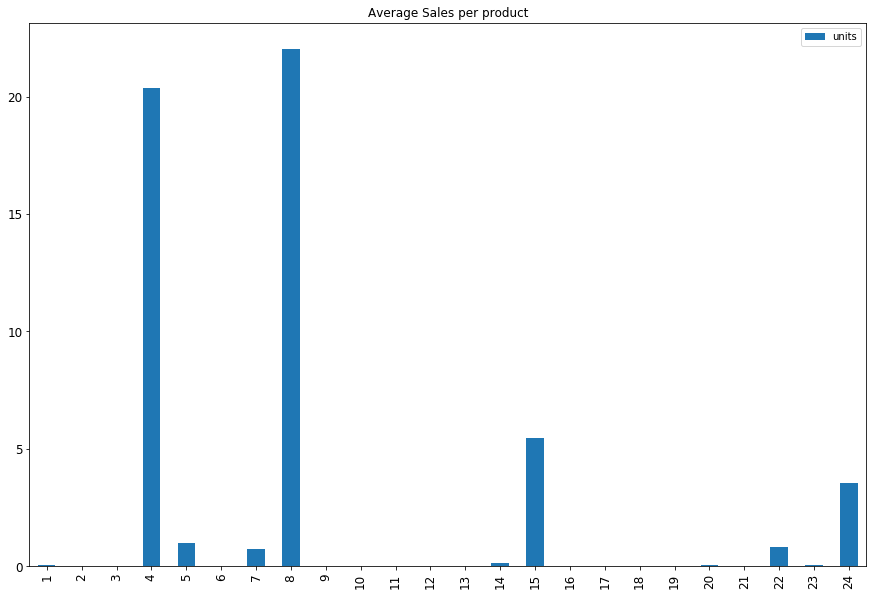

In [63]:
import matplotlib.pyplot as plt
top_products = sales.groupby('item_nbr').mean().reset_index()#.describe()

top_products.sort_values('units',ascending=False).iloc[1:25].plot.bar(figsize=(12, 7))
_products[['units']].iloc[1:25].plot(kind='bar', title ="Average Sales per product", figsize=(15, 10), legend=True, fontsize=12)
plt.show()

In [66]:
weather.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


In [70]:
weather['heat'].groupby(weather['date'].str[:4]).describe().reset_index()

,date,count,unique,top,freq
0,2012,7168,62,0,3340
1,2013,7269,72,0,3159
2,2014,6080,77,0,3072


In [69]:
weather.groupby(weather['date'].str[:4]).mean().reset_index()

,date,station_nbr
0,2012,10.616629
1,2013,10.523456
2,2014,10.500000
